In [1]:
%%HTML

<script>
  function $$(id) {
    return Array.prototype.slice.call($(id));
  }

  function code_toggle() {
    $$('div.input').forEach(input => {
        input.style.display = code_shown ? 'none' : 'flex'
    })

    $('#toggleButton').val(code_shown ? 'Show Code' : 'Hide Code')
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>

# Teoría de Algoritmos I - Greedy

## Tardos 4

### Exercise 1

Decide whether you think the following statement is true or false. If it is true, give a short explanation. If it is false, give a counterexample.

> Let G be an arbitrary connected, undirected graph with a distinct cost c(e) on every edge e. Suppose e' is the cheapest edge in G; that is, c(e') < c(e) for every edge e != e∗. Then there is a minimum spanning tree T of G that contains the edge e'.

#### Solution

True. For example, if we use Kruskal the first edge will be e'.

### Exercise 2

For each of the following two statements, decide whether it is true or false. If it is true, give a short explanation. If it is false, give a counterexample.

> (a) Suppose we are given an instance of the Minimum Spanning Tree Problem on a graph G, with edge costs that are all positive and distinct. Let T be a minimum spanning tree for this instance. Now suppose we replace each edge cost c_e by its square, c_e^2, thereby creating a new instance of the problem with the same graph but different costs.
True or false? T must still be a minimum spanning tree for this new instance.

> (b) Suppose we are given an instance of the Shortest s-t Path Problem on a directed graph G. We assume that all edge costs are positive and distinct. Let P be a minimum-cost s-t path for this instance. Now suppose we replace each edge cost c_e by its square, c_e^2, thereby creating a new instance of the problem with the same graph but different costs.
True or false? P must still be a minimum-cost s-t path for this new instance.

#### Solution

**(a)** 
True. The relative order between the edges is the same.

**(b)** 
False. 



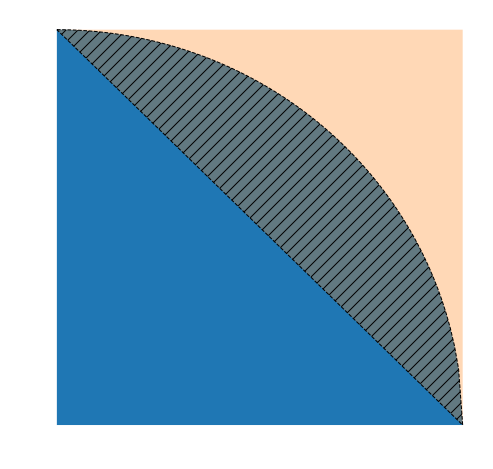

In [10]:
from matplotlib import pyplot as plt
import numpy as np
plt.figure(figsize=(8,8))

x = np.linspace(start=0, stop=2, num=100)
circle = [(4 - x**2)**0.5 for x in x]
line = [2 - x for x in x]
plt.fill(np.append(x,[0]), circle+[0])
plt.fill(np.append(x,[2]), line+[2], alpha = 0.3)
plt.fill(x, circle, edgecolor='black', fill=False, ls='--', lw=1, hatch='//')
plt.axis('off')
plt.show()

### Exercise 3

You are consulting for a trucking company that does a large amount of business shipping packages between New York and Boston. The volume is high enough that they have to send a number of trucks each day between the two locations. Trucks have a fixed limit W on the maximum amount of weight they are allowed to carry. Boxes arrive at the New York station one by one, and each package i has a weight wi. The trucking station is quite small, so at most one truck can be at the station at any time. Company policy requires that boxes are shipped in the order they arrive; otherwise, a customer might get upset upon seeing a box that arrived after his make it to Boston faster. At the moment, the company is using a simple greedy algorithm for packing: they pack boxes in the order they arrive, and whenever the next box does not fit, they send the truck on its way.

But they wonder if they might be using too many trucks, and they want your opinion on whether the situation can be improved. Here is how they are thinking. Maybe one could decrease the number of trucks needed by sometimes sending off a truck that was less full, and in this way allow the next few trucks to be better packed.

Prove that, for a given set of boxes with specified weights, the greedy algorithm currently in use actually minimizes the number of trucks that are needed. Your proof should follow the type of analysis we used for the Interval Scheduling Problem: it should establish the optimality of this greedy packing algorithm by identifying a measure under which it “stays ahead” of all other solutions.

#### Solution

Si movemos un paquete de un camión al siguiente, pueden ocurrir dos cosas:

1) Que el paquete pueda entrar en el siguiente camión, en cuyo caso se disminuirá la cantidad de camiones.

2) Que el paquete no pueda entrar en el sigueiente camión, en cuyo caso se deberá mover el último paquete de este camión al siguiente (donde nuevamente podrán darse los casos 1) o 2)).

De esta forma, un algoritmo distinto del algoritmo greedy usará la misma cantidad de camiones o más que el greedy.

### Exercise 4

Some of your friends have gotten in to the burgeoning field of time-series data mining, in which one looks for patterns in sequences of events that occur over time. Purchases at stock exchanges—what’s being bought— are one source of data with a natural ordering in time. Given a long sequence S of such events, your friends want an efficient way to detect certain “patterns” in them—for example, they may want to know if the four events

> buy Yahoo, buy eBay, buy Yahoo, buy Oracle

occur in this sequence S, in order but not necessarily consecutively.
They begin with a collection of possible events (e.g., the possible transactions) and a sequence S of n of these events. A given event may occur multiple times in S (e.g., Yahoo stock may be bought many times in a single sequence S). We will say that a sequence S′ is a subsequence of S if there is a way to delete certain of the events from S so that the remaining events, in order, are equal to the sequence S′. So, for example, the sequence of four events above is a subsequence of the sequence

> buy Amazon, buy Yahoo, buy eBay, buy Yahoo, buy Yahoo,  
 buy Oracle

Their goal is to be able to dream up short sequences and quickly detect whether they are subsequences of S. So this is the problem they pose to you: Give an algorithm that takes two sequences of events—S′ of length m and S of length n, each possibly containing an event more than once—and decides in time O(m + n) whether S′ is a subsequence of S.

#### Solution

In [167]:
def is_subsequence(S, s):
    i, j = 0, 0
    while i < len(s) and j < len(S):
        i += S[j] == s[i]
        j += 1
    return i >= len(s)

print(is_subsequence([1,2,1,3,1,2], [1,3,1,2]))

True


### Exercise 5

Let’s consider a long, quiet country road with houses scattered very sparsely along it. (We can picture the road as a long line segment, with an eastern endpoint and a western endpoint.) Further, let’s suppose that despite the bucolic setting, the residents of all these houses are avid cell phone users. You want to place cell phone base stations at certain points along the road, so that every house is within four miles of one of the base stations.

Give an efficient algorithm that achieves this goal, using as few base stations as possible.

#### Solution

In [172]:
def stations(houses):
    last_station = -4
    stations = []
    for position in houses:
        if not last_station - 4 < position < last_station + 4:
            last_station = position + 4
            stations.append(last_station)
    return stations


houses = [1.5, 2, 4, 5, 9, 10, 10.5, 15, 20 ]
stations(houses)

[5.5, 14, 24]

### Exercise 6

Your friend is working as a camp counselor, and he is in charge of organizing activities for a set of junior-high-school-age campers. One of his plans is the following mini-triathalon exercise: each contestant must swim 20 laps of a pool, then bike 10 miles, then run 3 miles. The plan is to send the contestants out in a staggered fashion, via the following rule: the contestants must use the pool one at a time. In other words, first one contestant swims the 20 laps, gets out, and starts biking. As soon as this first person is out of the pool, a second contestant begins swimming the 20 laps; as soon as he or she is out and starts biking, a third contestant begins swimming . . . and so on.)

Each contestant has a projected swimming time (the expected time it will take him or her to complete the 20 laps), a projected biking time (the expected time it will take him or her to complete the 10 miles of bicycling), and a projected running time (the time it will take him or her to complete the 3 miles of running). Your friend wants to decide on a schedule for the triathalon: an order in which to sequence the starts of the contestants. Let’s say that the completion time of a schedule is the earliest time at which all contestants will be finished with all three legs of the triathalon, assuming they each spend exactly their projected swimming, biking, and running times on the three parts. (Again, note that participants can bike and run simultaneously, but at most one person can be in the pool at any time.) What’s the best order for sending people out, if one wants the whole competition to be over as early as possible? More precisely, give an efficient algorithm that produces a schedule whose completion time is as small as possible.

#### Solution

In [175]:
def triathlon(people):
    return sorted(people, key = lambda x: x[1]+x[2])
    
triathlon([
    (3,2,3),
    (4,3,1),
    (2,3,2)
])

[(4, 3, 1), (3, 2, 3), (2, 3, 2)]

### Exercise 7

The wildly popular Spanish-language search engine El Goog needs to do a serious amount of computation every time it recompiles its index. Fortunately, the company has at its disposal a single large supercomputer, together with an essentially unlimited supply of high-end PCs.
They’ve broken the overall computation into n distinct jobs, labeled J1, J2, . . . , Jn, which can be performed completely independently of one another. Each job consists of two stages: first it needs to be preprocessed on the supercomputer, and then it needs to be finished on one of the PCs. Let’s say that job Ji needs pi seconds of time on the supercomputer, followed by fi seconds of time on a PC.

Since there are at least n PCs available on the premises, the finishing of the jobs can be performed fully in parallel—all the jobs can be processed at the same time. However, the supercomputer can only work on a single job at a time, so the system managers need to work out an order in which to feed the jobs to the supercomputer. As soon as the first job in order is done on the supercomputer, it can be handed off to a PC for finishing; at that point in time a second job can be fed to the supercomputer; when the second job is done on the supercomputer, it can proceed to a PC regardless of whether or not the first job is done (since the PCs work in parallel); and so on.
Let’s say that a schedule is an ordering of the jobs for the supercomputer, and the completion time of the schedule is the earliest time at which all jobs will have finished processing on the PCs. This is an important quantity to minimize, since it determines how rapidly El Goog can generate a new index.

Give a polynomial-time algorithm that finds a schedule with as small a completion time as possible.

#### Solution

In [179]:
# Mismo que 6
def process(jobs):
    return sorted(jobs, key = lambda x: x[1])
    
process([
    (3,5),
    (4,4),
    (2,5)
])

[(4, 4), (3, 5), (2, 5)]

### Exercise 8

Suppose you are given a connected graph G, with edge costs that are all distinct. Prove that G has a unique minimum spanning tree.

#### Solution

Supongamos que T y T' son dos arboles de tendido mínimo distintos. Al ser distintos debe existir una arista e' en T' que no esté en T. Si agregamos la arista e' a T se debe generar un ciclo. En este caso pueden ocurrir 2 cosas:

1) No hay una arista e en el ciclo con mayor peso que e', entonces e' no puede pertenecer a un arbol de tendido mínimo, entonces llegamos a un absurdo ya que T' no podría ser MST.

2) Hay otra arista e en el ciclo con mayor peso que e', entonces e no puede pertenecer a un arbol de tendido mínimo, entonces llegamos a un absurdo ya que T no podría ser MST.

### Exercise 9

One of the basic motivations behind the Minimum Spanning Tree Problem is the goal of designing a spanning network for a set of nodes with minimum total cost. Here we explore another type of objective: designing a spanning network for which the most expensive edge is as cheap as possible.

Specifically, let G = (V , E) be a connected graph with n vertices, m edges, and positive edge costs that you may assume are all distinct. Let T = (V , E') be a spanning tree of G; we define the bottleneck edge of T to be the edge of T with the greatest cost.

A spanning tree T of G is a minimum-bottleneck spanning tree if there is no spanning tree T' of G with a cheaper bottleneck edge.

(a) Is every minimum-bottleneck tree of G a minimum spanning tree of G? Prove or give a counterexample.

(b) Is every minimum spanning tree of G a minimum-bottleneck tree of G? Prove or give a counterexample.

#### Solution

(a) Falso. Si la arista máxima de G es la única forma de conectar un vértice, entonces todos los arboles van a ser "minimum-bottleneck".

(b) Verdadero. Si hay otro arbol con menor "bottleneck" entonces, si agregamos la arista al MST se genera un ciclo en el cual la arista máxima no es la insertada, por lo que se llega a un absurdo (no era MST).


### Exercise 10 (Final 18/02/19)

Let G=(V,E) be an undirected graph with costs c_e ≥ 0 on the edges e∈E. 
Assume you are given a minimum-cost spanning tree T in G. Now assume
that a new edge is added to G, connecting two nodes v, w ∈ V with cost c.

a) Give an efficient algorithm to test if T remains the minimum-cost 
spanning tree with the new edge added to G (but not to the tree T). 
Make your algorithm run in time O(|E|). Can you do it in O(|V|) time? 
Please note any assumptions you make about what data structure is used 
to represent the tree T and the graph G.

b) Suppose T is no longer the minimum-cost spanning tree. 
Give a linear-time algorithm (time O(|E|)) to update the tree T to 
the new minimum-cost spanning tree.

#### Solution 

In [20]:
def dfs(G, v, visited, parents):
    for u, c in G[v].items():
        if not u in visited:
            visited.add(u)
            parents[u] = v
            dfs(G, u, visited, parents)
    return parents
            
def still_mst(G, T, v, w, c):
    parents = dfs(T, v, {v}, {v: None})
    max_edge = 0
    current = w
    following = parents[current]
    while following:
        max_edge = max(max_edge, T[current][following])
        current = following
        following = parents[current]
    return max_edge < c

G = {
    'a': {'b': 2, 'c': 1},
    'b': {'a': 2},
    'c': {'a': 1, 'e': 5},
    'd': {'e': 1, 'f': 1},
    'e': {'c': 5, 'd': 1},
    'f': {'d': 1, 'g': 7, 'h': 3},
    'g': {'f': 7},
    'h': {'f': 3}
}

print(still_mst(G, G, 'a', 'g', 8))

True


### Exercise 11

Suppose you are given a connected graph G = (V , E), with a cost ce on each edge e. In an earlier problem, we saw that when all edge costs are distinct, G has a unique minimum spanning tree. However, G may have many minimum spanning trees when the edge costs are not all distinct. Here we formulate the question: Can Kruskal’s Algorithm be made to find all the minimum spanning trees of G?

Recall that Kruskal’s Algorithm sorted the edges in order of increasing cost, then greedily processed edges one by one, adding an edge e as long as it did not form a cycle. When some edges have the same cost, the phrase “in order of increasing cost” has to be specified a little more carefully: we’ll say that an ordering of the edges is valid if the corresponding sequence of edge costs is nondecreasing. We’ll say that a valid execution of Kruskal’s Algorithm is one that begins with a valid ordering of the edges of G.

For any graph G, and any minimum spanning tree T of G, is there a valid execution of Kruskal’s Algorithm on G that produces T as output? Give a proof or a counterexample.

#### Solution

Verdadero.

**TODO: JUSTIFICAR**

### Exercise 12

Suppose you have n video streams that need to be sent, one after another, over a communication link. Stream i consists of a total of bi bits that need to be sent, at a constant rate, over a period of ti seconds. You cannot send two streams at the same time, so you need to determine a schedule for the streams: an order in which to send them. Whichever order you choose, there cannot be any delays between the end of one stream and the start of the next. Suppose your schedule starts at time 0 (and therefore ends at time  ni=1 ti, whichever order you choose). We assume that all the values bi and ti are positive integers.

Now, because you’re just one user, the link does not want you taking up too much bandwidth, so it imposes the following constraint, using a fixed parameter r:

> (∗) For each natural number t > 0, the total number of bits you send over the time interval from 0 to t cannot exceed rt.

Note that this constraint is only imposed for time intervals that start at 0, not for time intervals that start at any other value.

We say that a schedule is valid if it satisfies the constraint (∗) imposed by the link.

**The Problem.**
Given a set of n streams, each specified by its number of bits bi and its time duration ti, as well as the link parameter r, determine whether there exists a valid schedule.

Example. Suppose we have n = 3 streams, with

>(b1, t1) = (2000, 1), (b2, t2) = (6000, 2), (b3, t3) = (2000, 1),
and suppose the link’s parameter is r = 5000. Then the schedule that runs the streams in the order 1, 2, 3, is valid, since the constraint (∗) is satisfied:

> t = 1: the whole first stream has been sent, and 2000 < 5000 · 1 t = 2: half of the second stream has also been sent,
> and 2000+3000<5000·2
> Similar calculations hold for t = 3 and t = 4.

(a) Consider the following claim:
> Claim: There exists a valid schedule if and only if each stream i satisfies
> bi ≤ rti.

Decide whether you think the claim is true or false, and give a proof
of either the claim or its negation.

(b) Give an algorithm that takes a set of n streams, each specified by its number of bits bi and its time duration ti, as well as the link parameter r, and determines whether there exists a valid schedule. The running time of your algorithm should be polynomial in n.

In [196]:
streams = [(5000, 1), (5000, 1), (6000, 1)]

# Solution by sorting
def streaming(streams, r):
    rates = sorted(streams, key = lambda x: x[0]/x[1])
    b_total, t_total = 0, 0
    for b, t in rates:
        for j in range(t):
            b_total += b/t
            t_total += t
            if b_total/t_total > r: return False
    return True

streaming(streams, 5000)

# Solution by slacks
def streaming(streams, r):
    slacks = map(lambda x: r*x[1]-x[0], streams)
    return sum(slacks) >= 0

streaming(streams, 5000)

False

### Exercise 13

A small business—say, a photocopying service with a single large machine—faces the following scheduling problem. Each morning they get a set of jobs from customers. They want to do the jobs on their single machine in an order that keeps their customers happiest. Customer i’s job will take ti time to complete. Given a schedule (i.e., an ordering of the jobs), let Ci denote the finishing time of job i. For example, if job j is the first to be done, we would have Cj = tj; and if job j is done right after job i, we would have Cj = Ci + tj. Each customer i also has a given weight wi that represents his or her importance to the business. The happiness of customer i is expected to be dependent on the finishing time of i’s job. So the company decides that they want to order the jobs to minimize the weighted sum of the completion times,  $\sum_{i=1}^n$ wiCi.

Design an efficient algorithm to solve this problem. That is, you are given a set of n jobs with a processing time ti and a weight wi for each job. You want to order the jobs so as to minimize the weighted sum of the completion times,  ni=1 wiCi.

**Example**. Suppose there are two jobs: the first takes time t1 = 1 and has weight w1 = 10, while the second job takes time t2 = 3 and has weight w2 = 2. Then doing job 1 first would yield a weighted completion time of 10 · 1 + 2 · 4 = 18, while doing the second job first would yield the larger weighted completion time of 10 · 4 + 2 · 3 = 46.

#### Solution

Supongamos una solución $S_A$ y $S_{Greedy}$, para la solución greedy se debe cumplir que si $J_i$ se encuentra antes que $J_j$ entonces $\frac{w_i}{t_i} \geq \frac{w_j}{t_j}$. Para el caso en el cual son consecutivos, todas los demás valores de C_i se mantendrían iguales, por lo que las sumás pesadas se podrían resumir a:

$$Greedy = w_j*(C + t_j) + w_i*(C+t_j+t_i)$$
$$Alternativo = w_i*(C + t_i) + w_j*(C+t_i+t_j)$$

Entonces la diferencia será:

$$Greedy - Alternativo = w_i*t_j - w_j*t_i$$

Dado que $\frac{w_i}{t_i} \geq \frac{w_j}{t_j}$, entonces esta diferencia va a ser positiva siempre. Entonces la solución Greedy es óptima.

In [5]:
def schedule_jobs(jobs):
    return sorted(jobs, key = lambda x: x[0]/x[1])

jobs = [(100,1), (100,4)]

schedule_jobs(jobs)

[(100, 4), (100, 1)]

### Exercise 14

You’re working with a group of security consultants who are helping to monitor a large computer system. There’s particular interest in keeping track of processes that are labeled “sensitive.” Each such process has a designated start time and finish time, and it runs continuously between these times; the consultants have a list of the planned start and finish times of all sensitive processes that will be run that day.

As a simple first step, they’ve written a program called status_check that, when invoked, runs for a few seconds and records various pieces of logging information about all the sensitive processes running on the system at that moment. (We’ll model each invocation of status_check as lasting for only this single point in time.) What they’d like to do is to run status_check as few times as possible during the day, but enough that for each sensitive process P, status_check is invoked at least once during the execution of process P.

(a) Give an efficient algorithm that, given the start and finish times of all the sensitive processes, finds as small a set of times as possi- ble at which to invoke status_check, subject to the requirement that status_check is invoked at least once during each sensitive process P.

(b) While you were designing your algorithm, the security consultants were engaging in a little back-of-the-envelope reasoning. “Suppose we can find a set of k sensitive processes with the property that no two are ever running at the same time. Then clearly your algorithm will need to invoke status_check at least k times: no one invocation of status_check can handle more than one of these processes.”

This is true, of course, and after some further discussion, you all begin wondering whether something stronger is true as well, a kind of converse to the above argument. Suppose that k∗ is the largest value of k such that one can find a set of k sensitive processes with no two ever running at the same time. Is it the case that there must be a set of k∗ times at which you can run status_check so that some invocation occurs during the execution of each sensitive process? (In other words, the kind of argument in the previous paragraph is really the only thing forcing you to need a lot of invocations of status_ check.) Decide whether you think this claim is true or false, and give a proof or a counterexample.

#### Solution

TODO: Probar A  
TODO: B

In [26]:
processes = [(0,4),(7,10),(1,4),(6,8),(3,5)]
events = []
for pid, (s,f) in enumerate(processes):
    events.append((pid, s, 's'))
    events.append((pid, f, 'f'))

events.sort(key=lambda x: x[1])

checked = set()
checks = []
previous = set()
for event in events:
    pid, time, t = event
    if t == 'f' and not pid in checked:
        checked = checked.union(previous)
        checks.append(time)
        previous = set()
    elif t == 's':
        previous.add(pid)
        
# b TODO

[4, 8]


### Exercise 15

The manager of a large student union on campus comes to you with the following problem. She’s in charge of a group of n students, each of whom is scheduled to work one shift during the week. There are different jobs associated with these shifts (tending the main desk, helping with package delivery, rebooting cranky information kiosks, etc.), but we can view each shift as a single contiguous interval of time. There can be multiple shifts going on at once.

She’s trying to choose a subset of these n students to form a super- vising committee that she can meet with once a week. She considers such a committee to be complete if, for every student not on the committee, that student’s shift overlaps (at least partially) the shift of some student who is on the committee. In this way, each student’s performance can be observed by at least one person who’s serving on the committee.

Give an efficient algorithm that takes the schedule of n shifts and produces a complete supervising committee containing as few students as possible.

Example. Suppose n = 3, and the shifts are

- Monday 4 P.M.–Monday 8 P.M., 
- Monday 6 P.M.–Monday 10 P.M., 
- Monday 9 P.M.–Monday 11 P.M..

Then the smallest complete supervising committee would consist of just the second student, since the second shift overlaps both the first and the third.

#### Solution

Obtener el intervalo que termina primero, incluir en la solución el intervalo con el que tiene intersección y que termina más tarde. Marcar como vistos todos los intervalos con los que tiene intersección el intervalo seleccionado. Tomar el intervalo que termina primero de los no marcados y hacer lo mismo que antes.

### Exercise 16

Some security consultants working in the financial domain are cur- rently advising a client who is investigating a potential money-laundering scheme. The investigation thus far has indicated that n suspicious trans- actions took place in recent days, each involving money transferred into a single account. Unfortunately, the sketchy nature of the evidence to date means that they don’t know the identity of the account, the amounts of the transactions, or the exact times at which the transactions took place. What they do have is an approximate time-stamp for each transaction; the evidence indicates that transaction i took place at time ti ± ei, for some “margin of error” ei. (In other words, it took place sometime between ti − ei and ti + ei.) Note that different transactions may have different margins of error.

In the last day or so, they’ve come across a bank account that (for other reasons we don’t need to go into here) they suspect might be the one involved in the crime. There are n recent events involving the account, which took place at times x1, x2, . . . , xn. To see whether it’s plausible that this really is the account they’re looking for, they’re wondering whether it’s possible to associate each of the account’s n events with a distinct one of the n suspicious transactions in such a way that, if the account event at time xi is associated with the suspicious transaction that occurred approximately at time tj, then |tj − xi| ≤ ej. (In other words, they want to know if the activity on the account lines up with the suspicious transactions to within the margin of error; the tricky part here is that they don’t know which account event to associate with which suspicious transaction.)

Give an efficient algorithm that takes the given data and decides whether such an association exists. If possible, you should make the running time be at most O(n2).

#### Solution

Iterar eventos en orden, por cada uno buscar el intervalo que termina antes que lo contenga y matchearlo, si no hay entonces no existe solución.

### Exercise 17

Consider the following variation on the Interval Scheduling Problem. You have a processor that can operate 24 hours a day, every day. People submit requests to run daily jobs on the processor. Each such job comes with a start time and an end time; if the job is accepted to run on the processor, it must run continuously, every day, for the period between its start and end times. (Note that certain jobs can begin before midnight and end after midnight; this makes for a type of situation different from what we saw in the Interval Scheduling Problem.)

Given a list of n such jobs, your goal is to accept as many jobs as possible (regardless of their length), subject to the constraint that the processor can run at most one job at any given point in time. Provide an algorithm to do this with a running time that is polynomial in n. You may assume for simplicity that no two jobs have the same start or end times.

Example. Consider the following four jobs, specified by (start-time, end- time) pairs.
- (6 P.M., 6 A.M.), 
- (9 P.M., 4 A.M.), 
- (3 A.M., 2 P.M.), 
- (1 P.M., 7 P.M.).

The optimal solution would be to pick the two jobs (9 P.M., 4 A.M.) and (1 P.M., 7 P.M.), which can be scheduled without overlapping.

#### Solution

Para cada uno de los intervalos suponer que la solución lo incluye y calcular la solución. Y luego ver cual es la mejor.

### Exercise 18

Your friends are planning an expedition to a small town deep in the Canadian north next winter break. They’ve researched all the travel options and have drawn up a directed graph whose nodes represent intermediate destinations and edges represent the roads between them.

In the course of this, they’ve also learned that extreme weather causes roads in this part of the world to become quite slow in the winter and may cause large travel delays. They’ve found an excellent travel Web site that can accurately predict how fast they’ll be able to travel along the roads; however, the speed of travel depends on the time of year. More precisely, the Web site answers queries of the following form: given an edge e = (v, w) connecting two sites v and w, and given a proposed starting time t from location v, the site will return a value fe(t), the predicted arrival time at w. The Web site guarantees that fe(t) ≥ t for all edges e and all times t (you can’t travel backward in time), and that fe(t) is a monotone increasing function of t (that is, you do not arrive earlier by starting later). Other than that, the functions fe(t) may be arbitrary. For example, in areas where the travel time does not vary with the season, we would have fe(t) = t + le, where le is the time needed to travel from the beginning to the end of edge e.

Your friends want to use the Web site to determine the fastest way to travel through the directed graph from their starting point to their intended destination. (You should assume that they start at time 0, and that all predictions made by the Web site are completely correct.) Give a polynomial-time algorithm to do this, where we treat a single query to the Web site (based on a specific edge e and a time t) as taking a single computational step.

#### Solution

**Variación de Dijkstra**

```
def travel(G, s, d):
    q = heap()
    distances = {}
    parents = {}
    time[s] = 0
    parent[s] = None
    q.enqueue(s,0)
    while not q.empty():
        u = q.dequeue()
        for v in u.adjacents():
            if f(u,v,time[u]) < time[v]:
                time[v] = f(u,v,time[u]) 
                parent[v] = u
                q.enqueue(v, time[v])

```

### Exercise 19

A group of network designers at the communications company CluNet find themselves facing the following problem. They have a connected graph G = (V , E), in which the nodes represent sites that want to com- municate. Each edge e is a communication link, with a given available bandwidth be.
For each pair of nodes u, v ∈ V, they want to select a single u-v path P on which this pair will communicate. The bottleneck rate b(P) of this path P is the minimum bandwidth of any edge it contains; that is, b(P) = mine∈P be. The best achievable bottleneck rate for the pair u, v in G is simply the maximum, over all u-v paths P in G, of the value b(P).

It’s getting to be very complicated to keep track of a path for each pair of nodes, and so one of the network designers makes a bold suggestion: Maybe one can find a spanning tree T of G so that for every pair of nodes u, v, the unique u-v path in the tree actually attains the best achievable bottleneck rate for u, v in G. (In other words, even if you could choose any u-v path in the whole graph, you couldn’t do better than the u-v path in T.)
This idea is roundly heckled in the offices of CluNet for a few days, and there’s a natural reason for the skepticism: each pair of nodes might want a very different-looking path to maximize its bottleneck rate; why should there be a single tree that simultaneously makes everybody happy? But after some failed attempts to rule out the idea, people begin to suspect it could be possible.

Show that such a tree exists, and give an efficient algorithm to find one. That is, give an algorithm constructing a spanning tree T in which, for each u, v ∈ V, the bottleneck rate of the u-v path in T is equal to the best achievable bottleneck rate for the pair u, v in G.

#### Solution

Hacer Prim o Kruskal tomando máximos. Nos vamos asegurando que los b_w son lo más grandes posibles. Esto es equivalente a encontrar el MST del grafo con las aristas negativas.

### Exercise 20

Every September, somewhere in a far-away mountainous part of the world, the county highway crews get together and decide which roads to keep clear through the coming winter. There are n towns in this county, and the road system can be viewed as a (connected) graph G = (V , E) on this set of towns, each edge representing a road joining two of them. In the winter, people are high enough up in the mountains that they stop worrying about the length of roads and start worrying about their altitude—this is really what determines how difficult the trip will be.

So each road—each edge e in the graph—is annotated with a number ae that gives the altitude of the highest point on the road. We’ll assume that no two edges have exactly the same altitude value ae. The height of a path P in the graph is then the maximum of ae over all edges e on P. Finally, a path between towns i and j is declared to be winter-optimal if it achieves the minimum possible height over all paths from i to j.

The highway crews are going to select a set E′ ⊆ E of the roads to keep clear through the winter; the rest will be left unmaintained and kept off limits to travelers. They all agree that whichever subset of roads E′ they decide to keep clear, it should have the property that (V , E′) is a connected subgraph; and more strongly, for every pair of towns i and j, the height of the winter-optimal path in (V , E′) should be no greater than it is in the full graph G = (V , E). We’ll say that (V , E′) is a minimum-altitude connected subgraph if it has this property.
Given that they’re going to maintain this key property, however, they otherwise want to keep as few roads clear as possible. One year, they hit upon the following conjecture:

> The minimum spanning tree of G, with respect to the edge weights ae, is a minimum-altitude connected subgraph.

(In an earlier problem, we claimed that there is a unique minimum span- ning tree when the edge weights are distinct. Thus, thanks to the assump- tion that all ae are distinct, it is okay for us to speak of the minimum spanning tree.)

Initially, this conjecture is somewhat counterintuitive, since the min- imum spanning tree is trying to minimize the sum of the values ae, while the goal of minimizing altitude seems to be asking for a fairly different thing. But lacking an argument to the contrary, they begin considering an even bolder second conjecture:

> A subgraph (V , E′) is a minimum-altitude connected subgraph if and only if it contains the edges of the minimum spanning tree.

Note that this second conjecture would immediately imply the first one, since a minimum spanning tree contains its own edges.
So here’s the question.

(a) Is the first conjecture true, for all choices of G and distinct altitudes ae? Give a proof or a counterexample with explanation.

(b) Is the second conjecture true, for all choices of G and distinct altitudes ae? Give a proof or a counterexample with explanation.

#### Solution

TODO

### Exercise 21

Let us say that a graph G=(V,E) is a near-tree if it is connected and has at most n + 8 edges, where n = |V|. Give an algorithm with running time O(n) that takes a near-tree G with costs on its edges, and returns a minimum spanning tree of G. You may assume that all the edge costs are distinct.

#### Solution

BFS hasta que encontramos un ciclo, cuando encontramos el ciclo, eliminamos la arista más pesada. Esto lo repetimos 9 veces, hasta que queden n-1 aristas. De esta forma el grafo cumpliría con las siguientes 2 condiciones:

- |V| - 1 aristas
- Es conexo

Las cuales implican que:

- No posee ciclos

Y por lo tanto sería un arbol, al mantener los mismos |V| sería de tendido y al eliminar siempre la arista de mayor peso de cada ciclo sería un arbol de tendido mínimo.

### Exercise 22

Consider the Minimum Spanning Tree Problem on an undirected graph G=(V,E), with a cost ce ≥0 on each edge, where the costs may not all be different. If the costs are not all distinct, there can in general be many distinct minimum-cost solutions. Suppose we are given a spanning tree T ⊆ E with the guarantee that for every e ∈ T, e belongs to some minimum-cost spanning tree in G. Can we conclude that T itself must be a minimum-cost spanning tree in G? Give a proof or a counterexample with explanation.

#### Solution

Contraejemplo:

![4_22.png](4_22.png)

### Exercise 23

Recall the problem of computing a minimum-cost arborescence in a directed graph G = (V , E), with a cost ce ≥ 0 on each edge. Here we will consider the case in which G is a directed acyclic graph—that is, it contains no directed cycles.

As in general directed graphs, there can be many distinct minimum- cost solutions. Suppose we are given a directed acyclic graph G = (V , E), and an arborescence A ⊆ E with the guarantee that for every e ∈ A, e belongs to some minimum-cost arborescence in G. Can we conclude that A itself must be a minimum-cost arborescence in G? Give a proof or a counterexample with explanation.